# Bakery Sales

<img src="https://www.theinternationalkitchen.com/wp-content/uploads/2020/01/TIK_FrenchCookingClasses_croissants-1280x720.jpg" width="800">



I worked part time at a small bakery.

Our bakery started delivery service in July 2019.

I collected this data and analyzed it to share with my employees.

My goal is this.

First, I'm going to analyze sales and sales by item. Look for months with low sales, and find out if there was a problem with the product or service. If you have a product that sells less, consider switching to another product.

Second, I'm going to see a volume of order by day of the week, time(lunch or afternoon), and customer's location. Then we can control the production.

Third, I'm going to see association rules. We could know which items have high support and lift.

# 1. Loading and Cleaning Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import Choropleth, Circle, Marker

In [2]:
df = pd.read_csv('../input/bakery-sales/Bakery Sales.csv')
df = df[0:2405]
df.head()

,datetime,day of week,total,place,angbutter,plain bread,jam,americano,croissant,caffe latte,...,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
0,2019-07-11 15:35,Thur,23800.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,2019-07-11 16:10,Thur,15800.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,2019-07-12 11:49,Fri,58000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-07-13 13:19,Sat,14800.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,2019-07-13 13:22,Sat,15600.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.replace(np.nan, 0, inplace = True)
df.tail()

,datetime,day of week,total,place,angbutter,plain bread,jam,americano,croissant,caffe latte,...,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
2400,2020-04-30 12:17,Thur,18800.0,석사동,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2401,2020-04-30 13:10,Thur,14800.0,후평 3동,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2402,2020-04-30 13:43,Thur,16800.0,동면,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2403,2020-04-30 15:01,Thur,18800.0,동면,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2404,2020-04-30 16:02,Thur,15300.0,후평 3동,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2405 entries, 0 to 2404
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            2405 non-null   object 
 1   day of week         2405 non-null   object 
 2   total               2405 non-null   float64
 3   place               2405 non-null   object 
 4   angbutter           2405 non-null   float64
 5   plain bread         2405 non-null   float64
 6   jam                 2405 non-null   float64
 7   americano           2405 non-null   float64
 8   croissant           2405 non-null   float64
 9   caffe latte         2405 non-null   float64
 10  tiramisu croissant  2405 non-null   float64
 11  cacao deep          2405 non-null   float64
 12  pain au chocolat    2405 non-null   float64
 13  almond croissant    2405 non-null   float64
 14  croque monsieur     2405 non-null   float64
 15  mad garlic          2405 non-null   float64
 16  milk t

In [5]:
df.describe()

,total,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,...,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
count,2.405000e+03,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,...,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000
mean,2.117634e+04,1.334719,0.425364,0.103534,0.211227,0.433680,0.088150,0.389189,0.150520,0.299792,...,0.087318,0.163825,0.037422,0.015800,0.233680,0.197505,0.099792,0.022453,0.002911,0.019958
std,2.707763e+04,1.190567,0.650052,0.351619,0.515442,0.865947,0.318137,0.725607,0.409695,0.608061,...,0.302281,0.443783,0.194166,0.137423,0.469835,0.530746,0.359127,0.150964,0.053883,0.145712
min,1.280000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.580000e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.850000e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.300000e+04,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.293000e+06,11.000000,5.000000,5.000000,5.000000,16.000000,3.000000,14.000000,4.000000,6.000000,...,2.000000,5.000000,2.000000,3.000000,4.000000,6.000000,4.000000,2.000000,1.000000,2.000000


In [6]:
df['date'] = pd.to_datetime(df['datetime'])
df.drop('datetime', axis = 1, inplace = True)

df['dates'] = df['date'].dt.strftime("%Y-%m")
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour

df.sample()

,day of week,total,place,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,...,wiener,vanila latte,berry ade,tiramisu,merinque cookies,date,dates,month,day,hour
1818,Thur,15300.0,교동,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2020-02-27 11:24:00,2020-02,2,27,11


In [7]:
df_month_sale = df.groupby(df['dates'], as_index = False)['total'].sum()
df_month_sale

,dates,total
0,2019-07,4076500.0
1,2019-08,6100500.0
2,2019-09,4895500.0
3,2019-10,3959100.0
4,2019-11,4543000.0
5,2019-12,5009500.0
6,2020-01,4582500.0
7,2020-02,6423700.0
8,2020-03,6445100.0
9,2020-04,4893700.0


# 2. EDA

## Total Sales

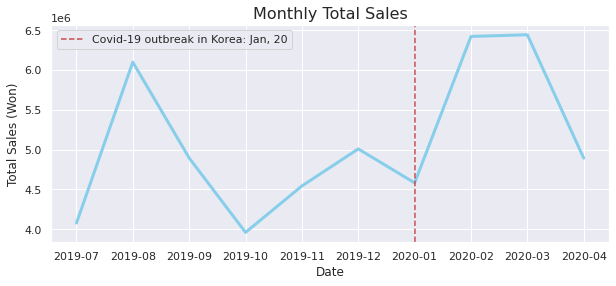

In [8]:
sns.set(style = 'darkgrid')
plt.figure(figsize = (10,4))

sns.lineplot(data = df_month_sale, x = 'dates', y = 'total', color = 'skyblue', linewidth = 3)
plt.axvline(x = '2020-01', color = 'r', linestyle = '--', label = 'Covid-19 outbreak in Korea: Jan, 20')

plt.legend()
plt.title('Monthly Total Sales', size = 16)
plt.xlabel('Date')
plt.ylabel('Total Sales (Won)')
plt.show()

Since we started delivery service on July 11th, July recorded 20 days of sales.

In August, it posted sales of 6 million won, but declined significantly in September and October.

Since Korea's first coronavirus confirmed, delivery sales have increased dramatically.

### Trend of Corona Virus

In [9]:
corona = pd.read_csv('../input/corona/corona.csv')

corona['date'] = pd.to_datetime(corona['date'])
corona['date'] = corona['date'].dt.strftime("%Y-%m-%d")
corona.set_index('date', inplace=True)

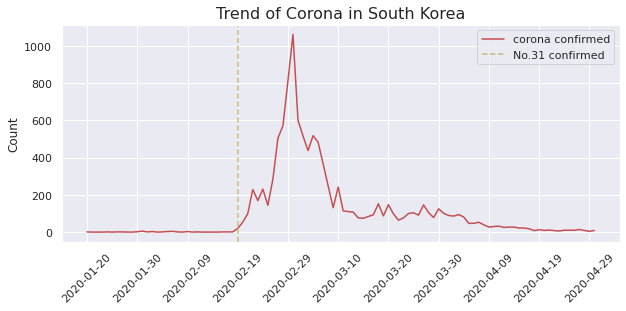

In [10]:
sns.set(style = 'darkgrid')

fig, ax = plt.subplots(figsize = (10,4))
x= corona.index
y = corona.confirmed

ax.plot(x,y, label = 'corona confirmed', color = 'r')
plt.axvline(x = '2020-02-19', color = 'y', linestyle = '--', label = 'No.31 confirmed')
ax.set_xticks(ax.get_xticks()[::10])
plt.xticks(rotation = 45)
plt.title("Trend of Corona in South Korea", size = 16)
plt.ylabel('Count')
plt.legend()
plt.show()

This has a high correlation with the corona confirmed graph.

On February 18th, a large-scale spread began from confirmed patient 31.

It seems that during this period, customers used delivery services rather than stores, and sales increased sharply.

Delivery sales declined as the spread eased in April.

It can be speculated that the store's utilization rate has increased.

In [11]:
df_month_pain = df.groupby(df['dates'], as_index = False)[['angbutter', 'plain bread', 'jam',
                                                           'croissant', 'tiramisu croissant',
                                                           'cacao deep', 'pain au chocolat', 'almond croissant', 'croque monsieur',
                                                           'mad garlic', 'gateau chocolat', 'pandoro',
                                                           'cheese cake', 'orange pound', 'wiener','tiramisu', 'merinque cookies']].sum()
df_month_pain

,dates,angbutter,plain bread,jam,croissant,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,croque monsieur,mad garlic,gateau chocolat,pandoro,cheese cake,orange pound,wiener,tiramisu,merinque cookies
0,2019-07,187.0,40.0,9.0,80.0,65.0,7.0,47.0,20.0,0.0,0.0,19.0,27.0,0.0,34.0,24.0,5.0,0.0
1,2019-08,430.0,105.0,32.0,151.0,77.0,18.0,101.0,38.0,0.0,0.0,32.0,64.0,0.0,57.0,98.0,2.0,9.0
2,2019-09,337.0,79.0,21.0,113.0,76.0,52.0,79.0,25.0,0.0,0.0,36.0,35.0,0.0,51.0,56.0,0.0,8.0
3,2019-10,249.0,71.0,26.0,92.0,68.0,30.0,80.0,26.0,0.0,0.0,12.0,30.0,2.0,43.0,42.0,0.0,2.0
4,2019-11,288.0,116.0,36.0,92.0,78.0,32.0,62.0,15.0,0.0,0.0,10.0,35.0,16.0,50.0,39.0,0.0,3.0
5,2019-12,314.0,101.0,27.0,89.0,117.0,39.0,67.0,22.0,0.0,0.0,14.0,25.0,16.0,61.0,45.0,0.0,3.0
6,2020-01,300.0,97.0,23.0,79.0,99.0,39.0,46.0,16.0,0.0,0.0,16.0,45.0,17.0,52.0,42.0,0.0,4.0
7,2020-02,391.0,137.0,29.0,128.0,111.0,46.0,79.0,33.0,0.0,0.0,26.0,55.0,18.0,86.0,48.0,0.0,7.0
8,2020-03,403.0,172.0,31.0,120.0,132.0,51.0,91.0,21.0,0.0,0.0,23.0,40.0,13.0,74.0,35.0,0.0,4.0
9,2020-04,311.0,105.0,15.0,99.0,113.0,48.0,69.0,17.0,0.0,0.0,22.0,38.0,8.0,54.0,46.0,0.0,8.0


## Monthly Sales of Pain

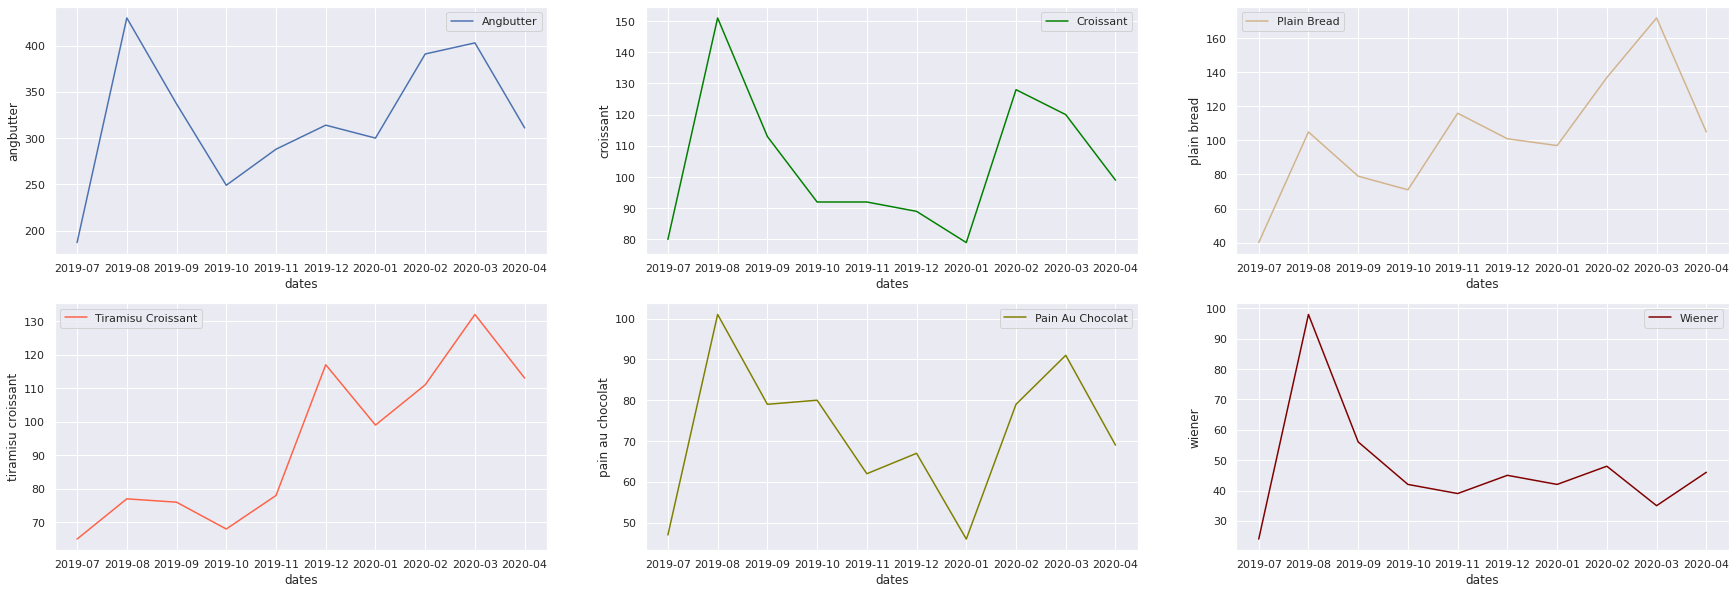

In [12]:
sns.set(style = 'darkgrid')
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(ncols = 3, nrows = 2)

figure.set_size_inches(30,10)
sns.lineplot(data = df_month_pain, x = 'dates', y = 'angbutter', label = 'Angbutter', ax = ax1)
sns.lineplot(data = df_month_pain, x = 'dates', y = 'croissant', label = 'Croissant', ax = ax2, color = 'green')
sns.lineplot(data = df_month_pain, x = 'dates', y = 'plain bread', label = 'Plain Bread', ax = ax3, color = 'Tan')
sns.lineplot(data = df_month_pain, x = 'dates', y = 'tiramisu croissant', label = 'Tiramisu Croissant', ax = ax4, color = 'Tomato')
sns.lineplot(data = df_month_pain, x = 'dates', y = 'pain au chocolat', label = 'Pain Au Chocolat', ax = ax5, color = 'Olive')
sns.lineplot(data = df_month_pain, x = 'dates', y = 'wiener', label = 'Wiener', ax = ax6, color = 'Maroon')

plt.show()

Angbutter that the most selling menu in our store is strongly related to the total profit. so Angbutter has a similar trend to the sales graph.

The croissant, Pain Au Chocolat is in Febuary, it had a very small sales volume. We had to check the process or ingredients once again.

Tiramisu  Croissant, Plain bread show an increasing trend. It looks like a good sign.

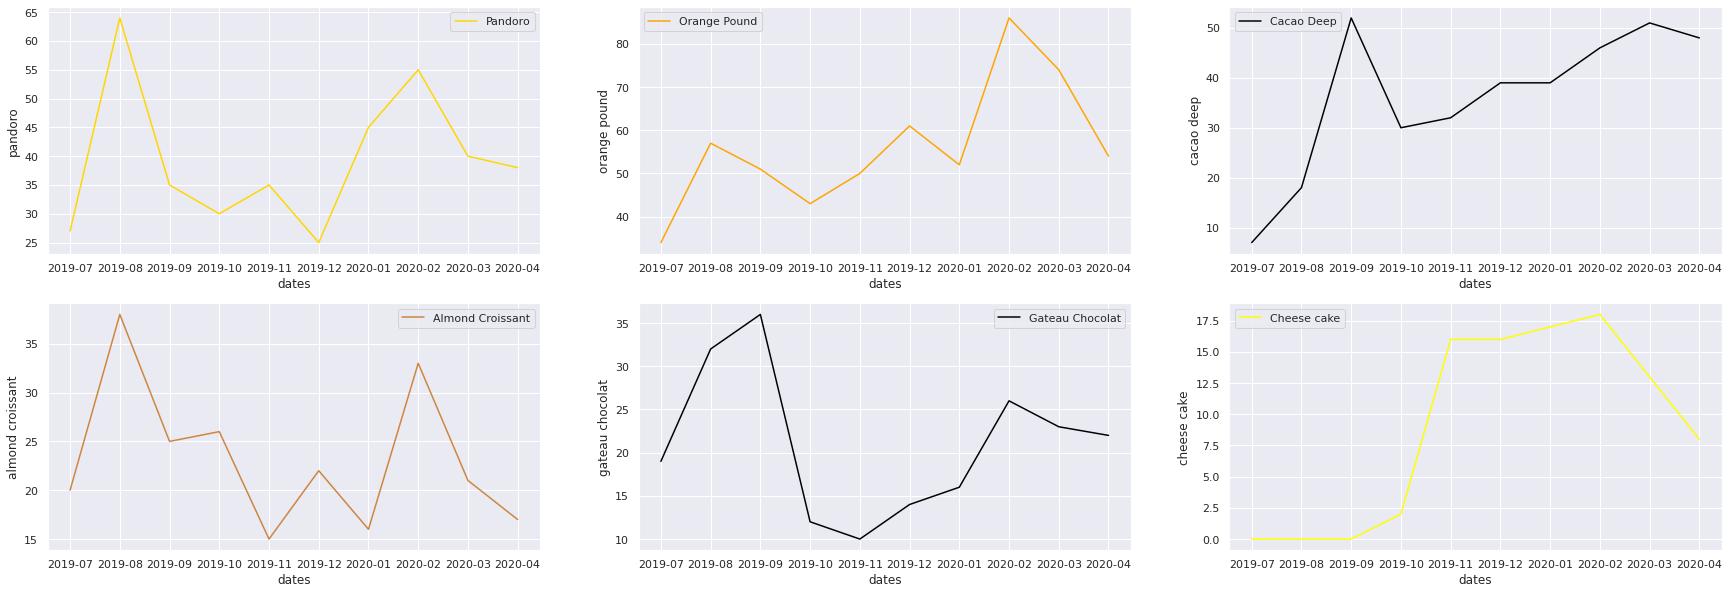

In [13]:
sns.set(style = 'darkgrid')
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(ncols = 3, nrows = 2)

figure.set_size_inches(30,10)
sns.lineplot(data = df_month_pain, x = 'dates', y = 'pandoro', label = 'Pandoro', ax = ax1, color = 'gold')
sns.lineplot(data = df_month_pain, x = 'dates', y = 'orange pound', label = 'Orange Pound', ax = ax2, color = 'orange')
sns.lineplot(data = df_month_pain, x = 'dates', y = 'cacao deep', label = 'Cacao Deep', ax = ax3, color = 'black')
sns.lineplot(data = df_month_pain, x = 'dates', y = 'almond croissant', label = 'Almond Croissant', ax = ax4, color = 'Peru')
sns.lineplot(data = df_month_pain, x = 'dates', y = 'gateau chocolat', label = 'Gateau Chocolat', ax = ax5, color = 'black')
sns.lineplot(data = df_month_pain, x = 'dates', y = 'cheese cake', label = 'Cheese cake', ax = ax6, color = 'yellow')

plt.show()

Pandoro had the lowest sales volume in December. However, it has been showing decent sales since January.

Orange pound and cacao deep are also on the rise. In particular, cacao deep shows steady sales even when sales were low.

Almond croissants are selling poorly. To make an almond croissant, we need to make almond cream. Considering the sales volume, it is likely that production should be reduced or replaced with other products.

## Monthly Sales of Beverage

In [14]:
df_month_beverage = df.groupby(df['dates'], as_index = False)[['americano', 'caffe latte', 'milk tea', 'vanila latte', 'berry ade', 'lemon ade']].sum()
df_month_beverage

,dates,americano,caffe latte,milk tea,vanila latte,berry ade,lemon ade
0,2019-07,26.0,7.0,10.0,18.0,6.0,5.0
1,2019-08,46.0,27.0,16.0,23.0,9.0,5.0
2,2019-09,44.0,16.0,17.0,20.0,5.0,1.0
3,2019-10,43.0,17.0,6.0,27.0,2.0,4.0
4,2019-11,40.0,29.0,19.0,26.0,2.0,6.0
5,2019-12,65.0,26.0,22.0,16.0,4.0,1.0
6,2020-01,44.0,15.0,18.0,17.0,7.0,3.0
7,2020-02,86.0,19.0,27.0,42.0,8.0,4.0
8,2020-03,67.0,38.0,18.0,34.0,8.0,4.0
9,2020-04,47.0,18.0,7.0,17.0,3.0,5.0


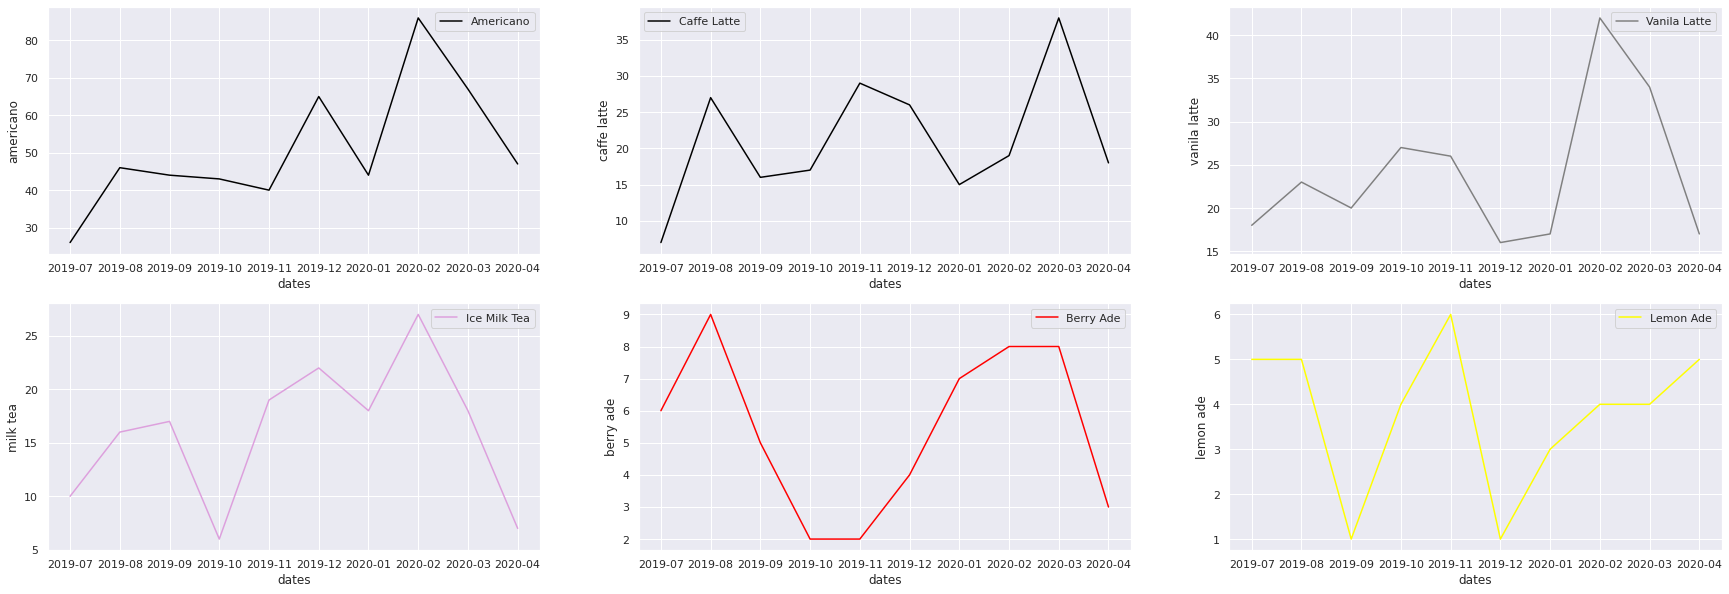

In [15]:
sns.set(style = 'darkgrid')
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(ncols = 3, nrows = 2)

figure.set_size_inches(30,10)
sns.lineplot(data = df_month_beverage, x = 'dates', y = 'americano', label = 'Americano', ax = ax1, color = 'black')
sns.lineplot(data = df_month_beverage, x = 'dates', y = 'caffe latte', label = 'Caffe Latte', ax = ax2, color = 'black')
sns.lineplot(data = df_month_beverage, x = 'dates', y = 'vanila latte', label = 'Vanila Latte', ax = ax3, color = 'gray')
sns.lineplot(data = df_month_beverage, x = 'dates', y = 'milk tea', label = 'Ice Milk Tea', ax = ax4, color = 'Plum')
sns.lineplot(data = df_month_beverage, x = 'dates', y = 'berry ade', label = 'Berry Ade', ax = ax5, color = 'red')
sns.lineplot(data = df_month_beverage, x = 'dates', y = 'lemon ade', label = 'Lemon Ade', ax = ax6, color = 'yellow')

plt.legend()
plt.show()

Beverage sales are low compared to bread sales.

In particular, most beverages sold very low in April.

This is thought to be because the spread of the corona has been mitigated and beverage were drank at bakery rather than delivery.

## By Day of Week

### Sales by day and time, place

In [16]:
df['time'] = ['lunch' if hour < 14 else 'afternoon' for hour in df['hour']]

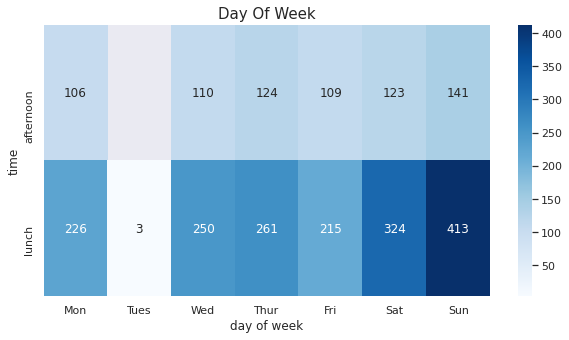

In [17]:
p = df.pivot_table(index = 'time', columns = 'day of week', values = 'day', aggfunc = 'count')
p = p.reindex(['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'], axis = 1)

plt.figure(figsize = (10,5))
g = sns.heatmap(p, annot = True, cmap = 'Blues', fmt=".0f")
plt.title("Day Of Week", size = 15)
plt.show()

### Sales of Angbutter(Our signature menu)

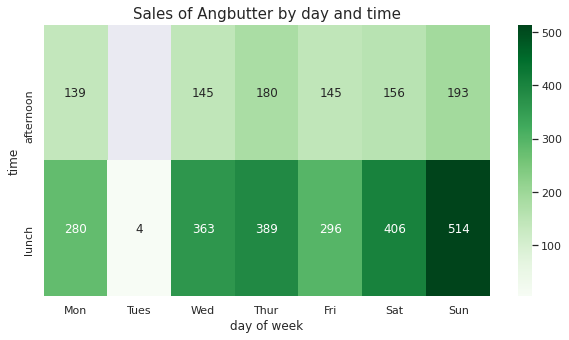

In [18]:
angbutter_pivot = df.pivot_table(index = 'time', columns = 'day of week', values = 'angbutter', aggfunc = 'sum')
angbutter_pivot = angbutter_pivot.reindex(['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'], axis = 1)

plt.figure(figsize = (10,5))
g = sns.heatmap(angbutter_pivot, annot = True, cmap = 'Greens', fmt= ".0f")
plt.title('Sales of Angbutter by day and time', size = 15)
plt.show()

In general, the order volume was high at lunch time (11, 12, 1 o'clock).

Especially, it shows a lot of sales on weekends.

We were very surprised that the number of orders was low on Friday!

## By Customer's Place

In [19]:
df_place = df[df['place'] != 0]

In [20]:
df_place['place'].replace({'소양동' : 'Soyang-dong', '효자 3동' : 'Hyoja3-dong', '후평 1동' : 'Hoopyeong1-dong', '후평 2동' : 'Hoopyeong2-dong', 
                           '석사동' : 'Seoksa-dong', '퇴계동' : 'Toegye-dong', '동면' : 'Dongmyeon', '후평 3동': 'Hoopyeong3-dong', "신사우동" : 'Sinsawoo-dong',
                          "강남동" : 'Gangnam-dong', "효자 1동": 'Hyoja1-dong', '조운동' : 'Jowoon-dong', '교동' : 'Gyo-dong', '효자 2동' : 'Hyoja2-dong', '약사명동' : 'Yaksamyeong-dong',
                          '근화동': 'Geunhwa-dong', '동내면' : 'Dongnae-myeon', '신동면' : 'Sindong-myeon', '교동 ': 'Gyo-dong'}, inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


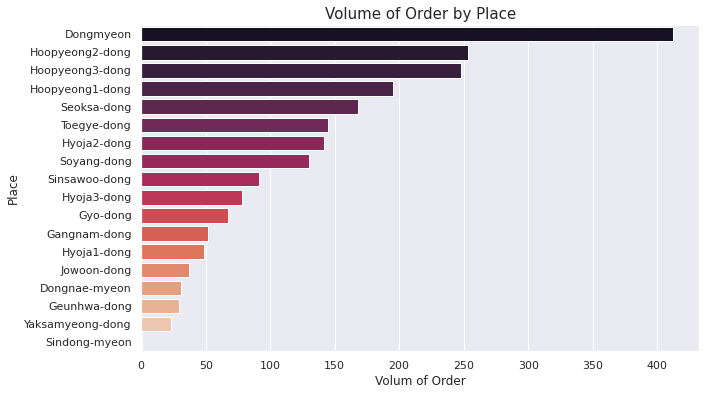

In [21]:
g = df_place.groupby('place').count()
g.reset_index(inplace = True)
g.sort_values(by = 'time', inplace = True, ascending = False)

plt.figure(figsize = (10,6))

sns.barplot(data = g, x = 'time', y = 'place', palette = 'rocket')
plt.title('Volume of Order by Place', size = 15)
plt.xlabel('Volum of Order')
plt.ylabel('Place')
plt.show()

Since our bakery is located in Dongmyeon, it showed the highest sales volume in Dongmyeon. It also showed a lot of sales in nearby Hupyeong-dong. 

The platform called  Beamin, which we use, shows poor sales rates in relatively distant neighborhoods because delivery charges vary according to distance.

For this reason, we are trying to set up a new branch to deliver itmes to distant areas.

Since the corona, many franchise bakeries are also delivering.

In [22]:
restaurant = pd.read_csv('../input/gangwon-restaurant/gangwon_restaurant.csv')
chuncheon_cafe = restaurant[(restaurant['시군구명'] == '춘천시') & 
                            (restaurant['상권업종대분류코드'] == 'Q') & 
                            (restaurant['상권업종중분류명'] == '제과제빵떡케익') |
                            (restaurant['상권업종중분류명'] == '커피점/카페')]

In [23]:
bakery = chuncheon_cafe[(chuncheon_cafe['상호명'] == '파리바게뜨') |
                        (chuncheon_cafe['상호명'] == '뚜레쥬르') |
                        (chuncheon_cafe['상호명'] == '자유빵집') |
                        (chuncheon_cafe['상호명'] == '스타벅스')]

bakery['상호명'].replace({'파리바게뜨' : 'Paris Baguette', '뚜레쥬르' : 'Tours les Jours', '자유빵집' : 'Our Bakery', '스타벅스' : 'Starbucks'}, inplace = True)

bakery = bakery[['상호명', '도로명주소', '위도', '경도']]
geo_df = bakery

In [24]:
map = folium.Map(location = [geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start = 10)

for n in geo_df.index:
    popup_name = geo_df.loc[n, '상호명']
    if geo_df.loc[n, '상호명'] == 'Starbucks':
        icon_color = 'green'
    elif geo_df.loc[n, '상호명'] == 'Our Bakery':
        icon_color = 'red'
    elif geo_df.loc[n, '상호명'] == 'Tours les Jours':
        icon_color = 'orange'
    else:
        icon_color = 'blue'
        
    Circle(
        location = [geo_df.loc[n, '위도'], geo_df.loc[n,'경도']],
        radius = 30,
        popup = popup_name,
        color = icon_color,
        fill = True,
        fill_color = icon_color).add_to(map)
map

This is a map showing Paris Baguette(blue) and Tous Les Jours(green), the representative Korean franchise bakery, and our bakery(red).

You can see that Paris Baguette is located near the station compared to Tous Les Jours.

We decided to target the Seoksa-dong, Toegye-dong, and Onui-dong areas where sales were relatively low due to the distance.

Finally, Onui-dong, which is located near the station and is expected to be less competitive, was selected.

# 3. Association Analysis

In [25]:
from mlxtend.frequent_patterns import apriori, association_rules

In [26]:
df_item = df.reset_index(inplace = True)
df_item = df.drop(['date','place', 'day of week', 'total', 'dates', 'month', 'day', 'hour','time', 'index'], axis = 1, index = None)
df_item = df_item >= 1
df_item.head()

,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,...,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
0,True,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
df_apriori = apriori(df_item, min_support = 0.01, use_colnames = True)
df_apriori.sort_values(by = 'support', ascending = False).head()

,support,itemsets
0,0.815800,(angbutter)
1,0.354262,(plain bread)
6,0.320582,(tiramisu croissant)
4,0.308108,(croissant)
20,0.267775,"(plain bread, angbutter)"


80% customers order ang butter, and about 35% order bread.

about 30% order tiramisu croissants, croissant.

In [28]:
df_apriori['length'] = df_apriori['itemsets'].apply(lambda x : len(x))

In [29]:
df_apriori2 = df_apriori[(df_apriori['length'] == 2) & df_apriori['support'] >= 0.05]
df_apriori2.sort_values(by = 'support', ascending = False).head()

,support,itemsets,length
20,0.267775,"(plain bread, angbutter)",2
25,0.247817,"(tiramisu croissant, angbutter)",2
23,0.229938,"(croissant, angbutter)",2
27,0.181289,"(pain au chocolat, angbutter)",2
34,0.167152,"(angbutter, orange pound)",2


In [30]:
rules = association_rules(df_apriori, metric = 'lift', min_threshold = 1)
rules.sort_values(by = 'lift', ascending = False, inplace = True)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
76,"(plain bread, americano)",(jam),0.046985,0.091476,0.012058,0.256637,2.805511,0.007760,1.222181
79,(jam),"(plain bread, americano)",0.091476,0.046985,0.012058,0.131818,2.805511,0.007760,1.097713
90,"(plain bread, pain au chocolat)",(jam),0.086071,0.091476,0.021622,0.251208,2.746157,0.013748,1.213319
95,(jam),"(plain bread, pain au chocolat)",0.091476,0.086071,0.021622,0.236364,2.746157,0.013748,1.196812
100,"(wiener, plain bread)",(jam),0.047401,0.091476,0.011642,0.245614,2.685008,0.007306,1.204322


# 4. Conclusion


While analyzing, I saw a lot of unexpected results I couldn't think of.

Although it was difficult to collect data directly, it was very beneficial to visualize and solve business problems(like monthly sales, sales by day of the week, time, place)

If it was fun, Upvote and comment please.

thank you for reading. 